# CMIP6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from global_land_mask import globe
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

In [9]:
#vv = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/Vertical velocity/*.nc'
#vv = '/media/rakshith/Seagate Expansion Drive/Good models/INM-CM5-0/Vertical velocity/*.nc'
vv = '/media/rakshith/Seagate Expansion Drive/Good models/MIROC6/Vertical velocity/*.nc'
om = xr.open_mfdataset(vv)

In [10]:
grid1 = om.sel(lat=slice(10,30), lon=slice(70,90))

lon_grid1, lat_grid1 = np.meshgrid(grid1.lon, grid1.lat)
mask1 = globe.is_land(lat_grid1, lon_grid1)

In [11]:
data = grid1.wap.where(mask1>0).mean(dim=['lat', 'lon']).squeeze()

In [14]:
#month = range(6,10)
month = 7
july = data.time.dt.month.isin(month)
climc = data.sel(time=july)

climc = climc.resample(time="1Y").mean()

year1='1990'
year2='2010'
year3='2070'
year4='2090'
clim1 = climc.sel(time=slice(year1, year2)).mean(dim='time')
clim2 = climc.sel(time=slice(year3, year4)).mean(dim='time')

wmax1 = np.max(abs(clim1))
wmax2 = np.max(abs(clim2))

om1 = np.divide(abs(clim1), abs(wmax1))
om2 = np.divide(abs(clim2), abs(wmax2))
Y = om1.plev.values/100

Text(0.5, 1.0, 'Average vertical velocity (w) for July, CMIP6')

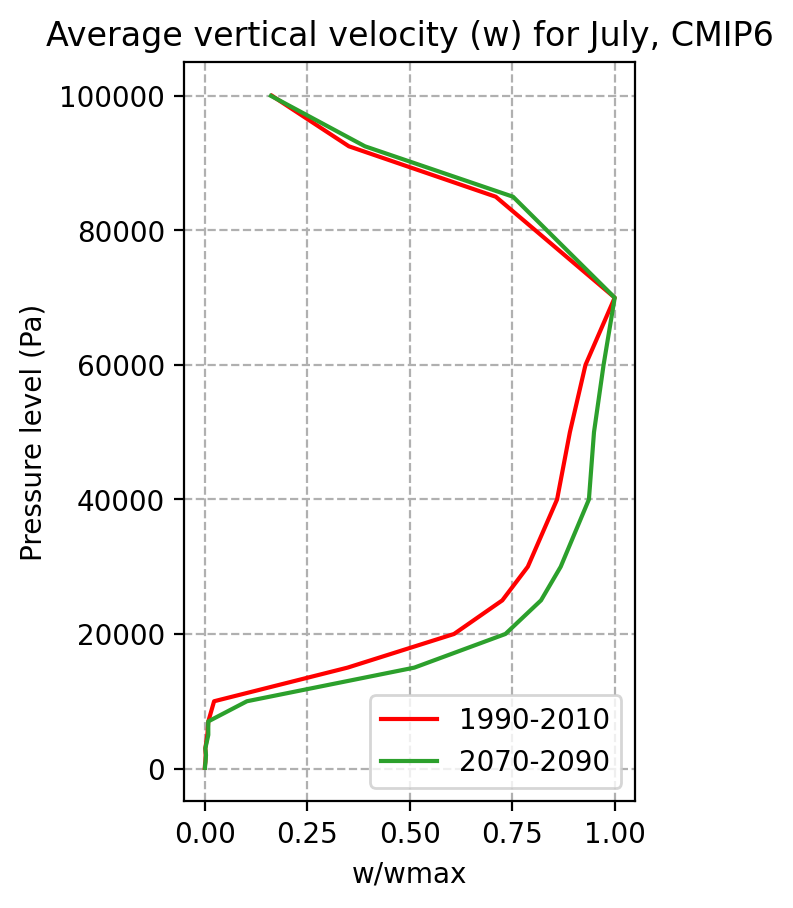

In [15]:
plt.subplot(1,2,1)
om1.plot(y='plev', c='r', label='1990-2010')
om2.plot(y='plev', c='tab:green', label='2070-2090')
plt.ylabel('Pressure level (Pa)')
plt.xlabel('w/wmax')
plt.grid(linestyle='--')
plt.legend()
plt.title('Average vertical velocity (w) for July, CMIP6')

# ERA5

In [41]:
b = '/media/rakshith/Seagate Expansion Drive/mraks/ERA vertical velocity.nc'
ds2 = xr.open_dataset(b)

lon_grid1, lat_grid1 = np.meshgrid(ds2.longitude, ds2.latitude)
mask2 = globe.is_land(lat_grid1, lon_grid1)

In [42]:
ds3 = ds2.w.where(mask2>0).mean(dim=['latitude', 'longitude']).squeeze()

In [68]:
month = range(6,10)
#month = 7
july = ds3.time.dt.month.isin(month)
clime = ds3.sel(time=july)

#clim = clim.resample(time="1Y").mean()

year1='1959'
year2='1968'
year3='1969'
year4='1978'
#year3='1999'
#year4='2008'
clim1 = clime.sel(time=slice(year1, year2)).mean(dim='time')
clim2 = clime.sel(time=slice(year3, year4)).mean(dim='time')

wmax1 = np.max(abs(clim1))
wmax2 = np.max(abs(clim2))

om1 = np.divide(abs(clim1), abs(wmax1))
om2 = np.divide(abs(clim2), abs(wmax2))
Y = np.arange(0,1001, 100)

Text(0.5, 1.0, 'JJAS average, ERA5')

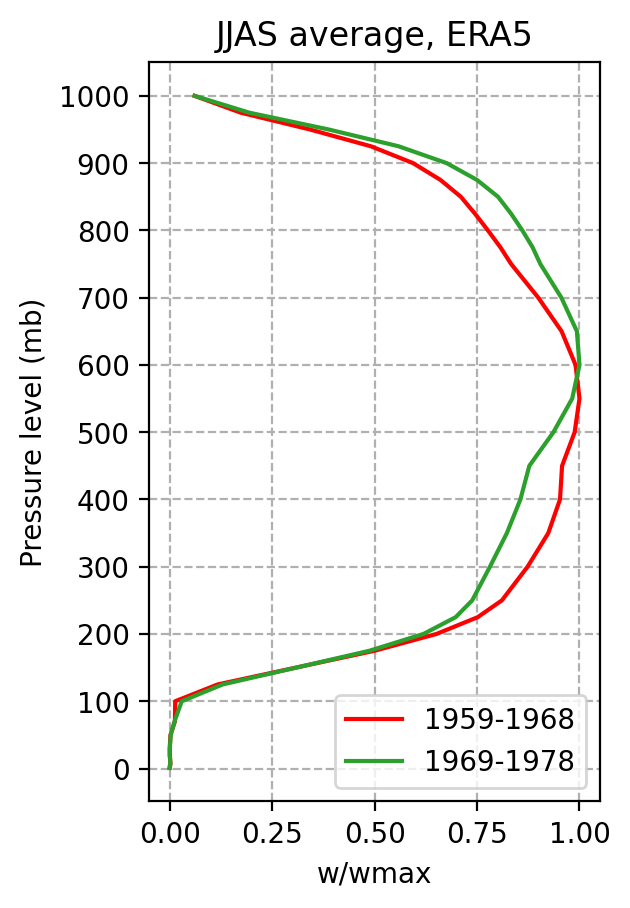

In [70]:
plt.subplot(1,2,1)
om1.plot(y='level', c='r', label=year1 + '-' + year2)
om2.plot(y='level', c='tab:green', label=year3 + '-' + year4)
plt.ylabel('Pressure level (mb)')
plt.xlabel('w/wmax')
plt.grid(linestyle='--')
plt.yticks(Y)
plt.legend()
plt.title('JJAS average, ERA5')

In [49]:
month = range(6,10)
july = ds3.time.dt.month.isin(month)
clim = ds3.sel(time=july)
clim = clim.resample(time="1Y").mean()
inclim = clim.sel(time='1987').mean(dim='time')
tempclim = clim.sel(time='1982').mean(dim='time')
meanclim = clim.mean(dim='time')

In [50]:
wmax1 = np.max(abs(inclim))
wmax2 = np.max(abs(meanclim))
wmax3 = np.max(abs(tempclim))

om1 = np.divide(abs(inclim), abs(wmax1))
om2 = np.divide(abs(meanclim), abs(wmax2))
om3 = np.divide(abs(tempclim), abs(wmax3))
Y = np.arange(0,1001, 100)

Text(0.5, 1.0, 'JJAS average, ERA5')

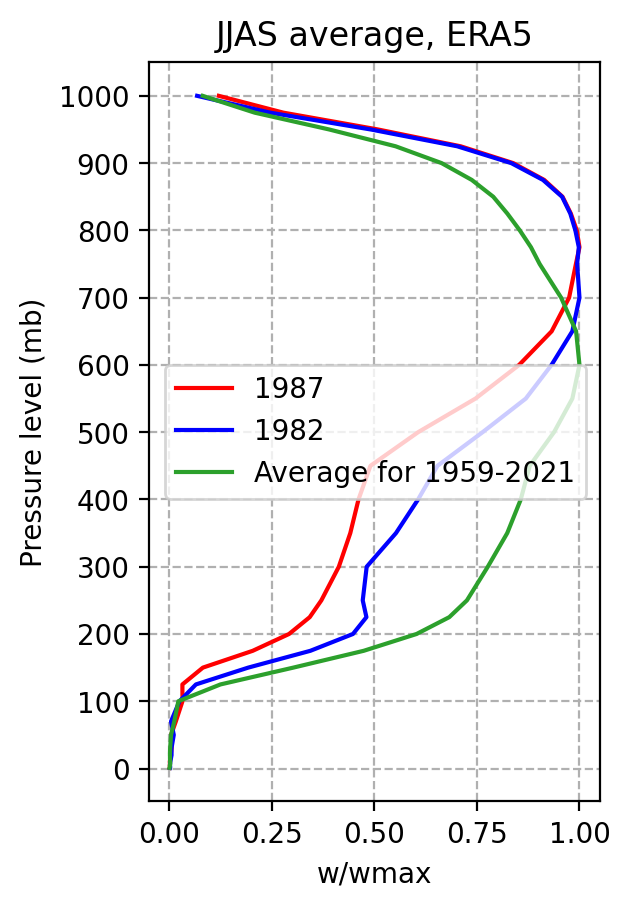

In [52]:
plt.subplot(1,2,1)
om1.plot(y='level', c='r', label='1987')
om3.plot(y='level', c='b', label='1982')
om2.plot(y='level', c='tab:green', label='Average for 1959-2021')
plt.ylabel('Pressure level (mb)')
plt.xlabel('w/wmax')
plt.grid(linestyle='--')
plt.yticks(Y)
plt.legend()
plt.title('JJAS average, ERA5')

# ERA vs CMIP6

In [53]:
climx = climc.sel(time=slice('2000', '2014')).mean(dim='time')
climy = clime.sel(time=slice('2000', '2014')).mean(dim='time')
Y = climx.plev.values/100

In [54]:
wmaxx = np.max(abs(climx))
wmaxy = np.max(abs(climy))

om1 = np.divide(abs(climx), abs(wmaxx))
om2 = np.divide(abs(climy), abs(wmaxy))

Text(0.5, 1.0, 'July, 2000-2014')

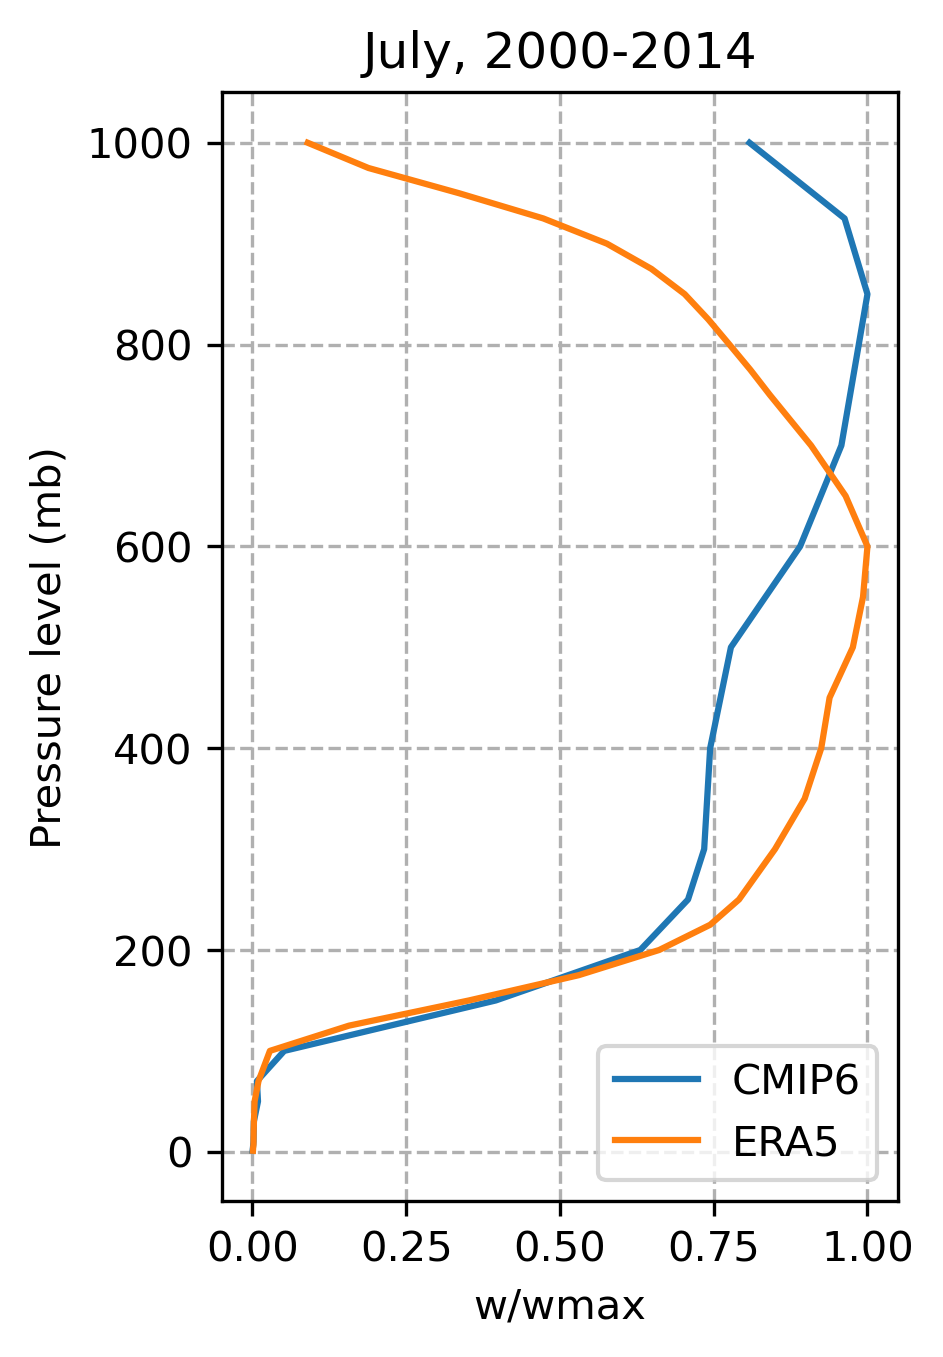

In [56]:
plt.subplot(1,2,1)
plt.plot(om1, Y, label='CMIP6')
plt.plot(om2, climy.level, label='ERA5')
plt.ylabel('Pressure level (mb)')
plt.xlabel('w/wmax')
plt.grid(linestyle='--')
plt.legend()
plt.title('July, 2000-2014')

# Drought years to check vertical profile change

In [2]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
d = xr.open_dataset(h)

In [3]:
lon_grid, lat_grid = np.meshgrid(d.longitude, d.latitude)
eramask = globe.is_land(lat_grid, lon_grid)

In [4]:
jjas = d.time.dt.month.isin(range(6, 10)) #JJAS
#months = d.time.dt.month.isin(range(7, 9))
clim = d.sel(time=jjas) 
clim2 = clim.groupby('time.year').mean('time')
clim3 = 86400*clim2.where(eramask>0).mean(dim=['latitude', 'longitude'])

In [8]:
mean = clim3.mtpr.mean()
drought = mean-0.1*mean

In [9]:
newmean = np.array([float(mean)]*63)
x=clim3.mtpr.year
y=clim3.mtpr.values

x2 = np.linspace(x[0], x[-1] + 1, len(x) * 100)
a2 = np.interp(x2, x, newmean)
b2 = np.interp(x2, x, y)
x, a, b = x2, a2, b2    

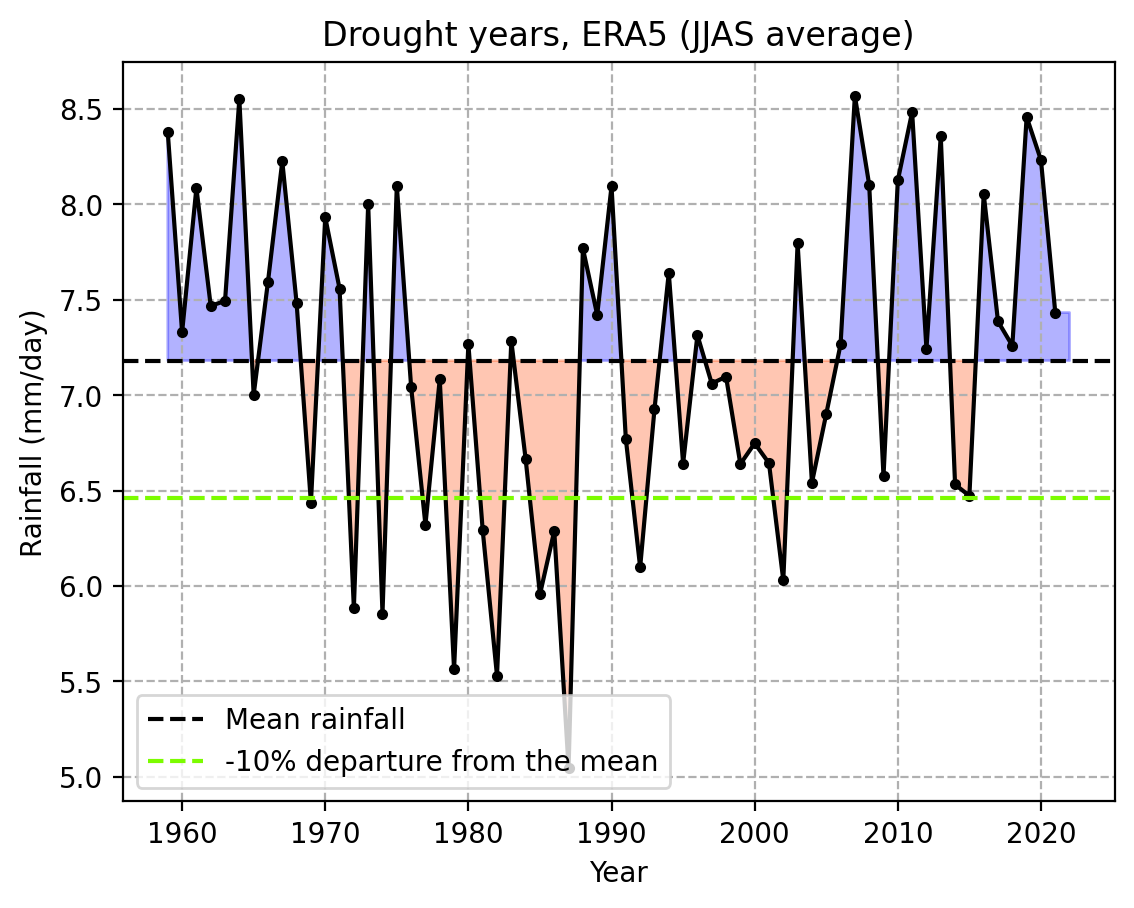

In [31]:
clim3.mtpr.plot(c='black', marker='.' )
plt.axhline(y = mean, color = 'black', linestyle = '--', label='Mean rainfall')
plt.axhline(y = drought, color = 'lawngreen', linestyle = '--', label='-10% departure from the mean')
plt.ylabel('Rainfall (mm/day)')
plt.xlabel('Year')
plt.title('Drought years, ERA5 (JJAS average)')
plt.fill_between(x, a, np.maximum(0, b), where=a>b, alpha=0.3, color='orangered')
plt.fill_between(x, a, np.maximum(0, b), where=a<b, alpha=0.3, color='blue')
plt.grid(linestyle = '--')
plt.legend()